In [1]:
!pip install textblob
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk
from textblob import TextBlob

import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Downloaded required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Load dataset
df = pd.read_csv('blogs.csv')
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [4]:
# Preview data
print(df.head())

                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism


In [5]:
# Data Preprocessing Function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\n', ' ', text)  # Remove newlines
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation/numbers
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

In [6]:
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
# Basic text cleaning function (no NLTK)
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    return text

In [8]:
# Apply cleaning
df['Clean_Text'] = df['Data'].apply(clean_text)

In [9]:
# TF-IDF vectorization with built-in English stopword removal
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X = vectorizer.fit_transform(df['Clean_Text'])

In [10]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['Clean_Text'])
y = df['Labels']

In [11]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Train Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [13]:
# Predict on test data
y_pred = nb_model.predict(X_test)

In [14]:
# Evaluation
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

                          precision    recall  f1-score   support

             alt.atheism       0.47      0.78      0.58        18
           comp.graphics       0.78      0.78      0.78        18
 comp.os.ms-windows.misc       0.95      0.82      0.88        22
comp.sys.ibm.pc.hardware       0.88      0.56      0.68        25
   comp.sys.mac.hardware       0.76      0.62      0.68        21
          comp.windows.x       1.00      0.84      0.91        25
            misc.forsale       1.00      0.78      0.88        18
               rec.autos       0.84      0.89      0.86        18
         rec.motorcycles       0.83      0.94      0.88        16
      rec.sport.baseball       0.73      0.89      0.80        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.83      1.00      0.90        19
         sci.electronics       0.38      0.75      0.50        16
                 sci.med       0.89      0.94     

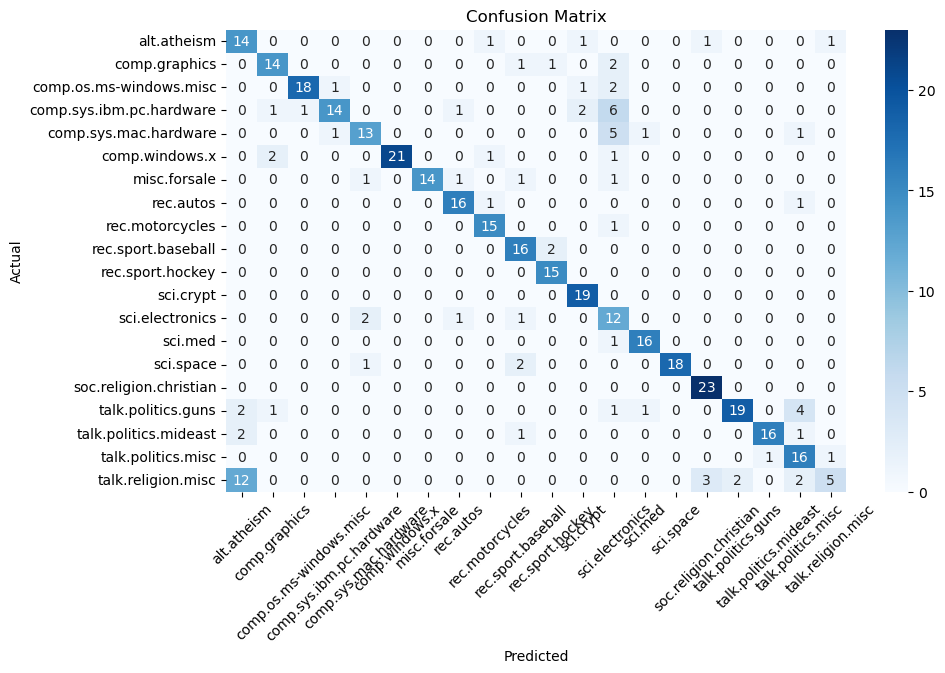

In [15]:
# Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45)
plt.show()


In [16]:
# Sentiment Analysis using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0.05:
        return 'Positive'
    elif polarity < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [17]:
# Applying sentiment analysis
df['Sentiment'] = df['Data'].apply(get_sentiment)

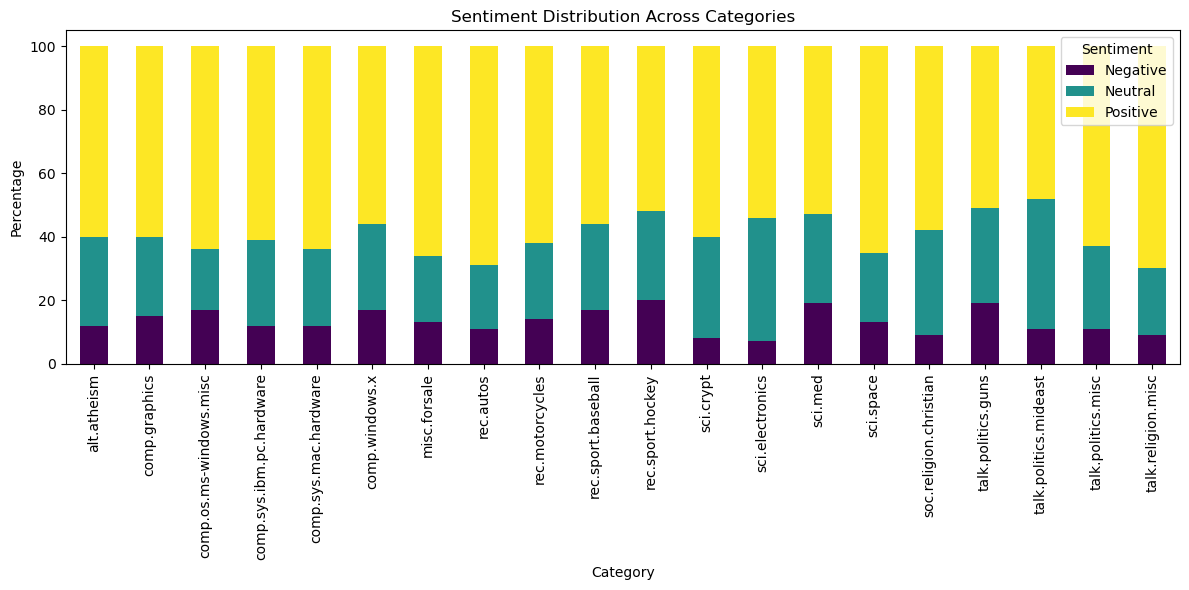

In [18]:
# Sentiment distribution by category
sentiment_distribution = pd.crosstab(df['Labels'], df['Sentiment'], normalize='index') * 100
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Sentiment Distribution Across Categories")
plt.ylabel("Percentage")
plt.xlabel("Category")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()